In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data

In [4]:
data = pd.read_csv('Walmart_Sales.csv')
print(data.shape)
data.head()

(6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Collecting X & Y

In [31]:
X = data['Temperature'].values
Y = data['Weekly_Sales'].values

# Mean X & Y

In [32]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 & b2
numer = 0
denom = 0

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

# Print Coefficient

In [33]:
print(b1, b0)

-1952.4192272081996 1165406.012792378


# Plot Scatter-Plot

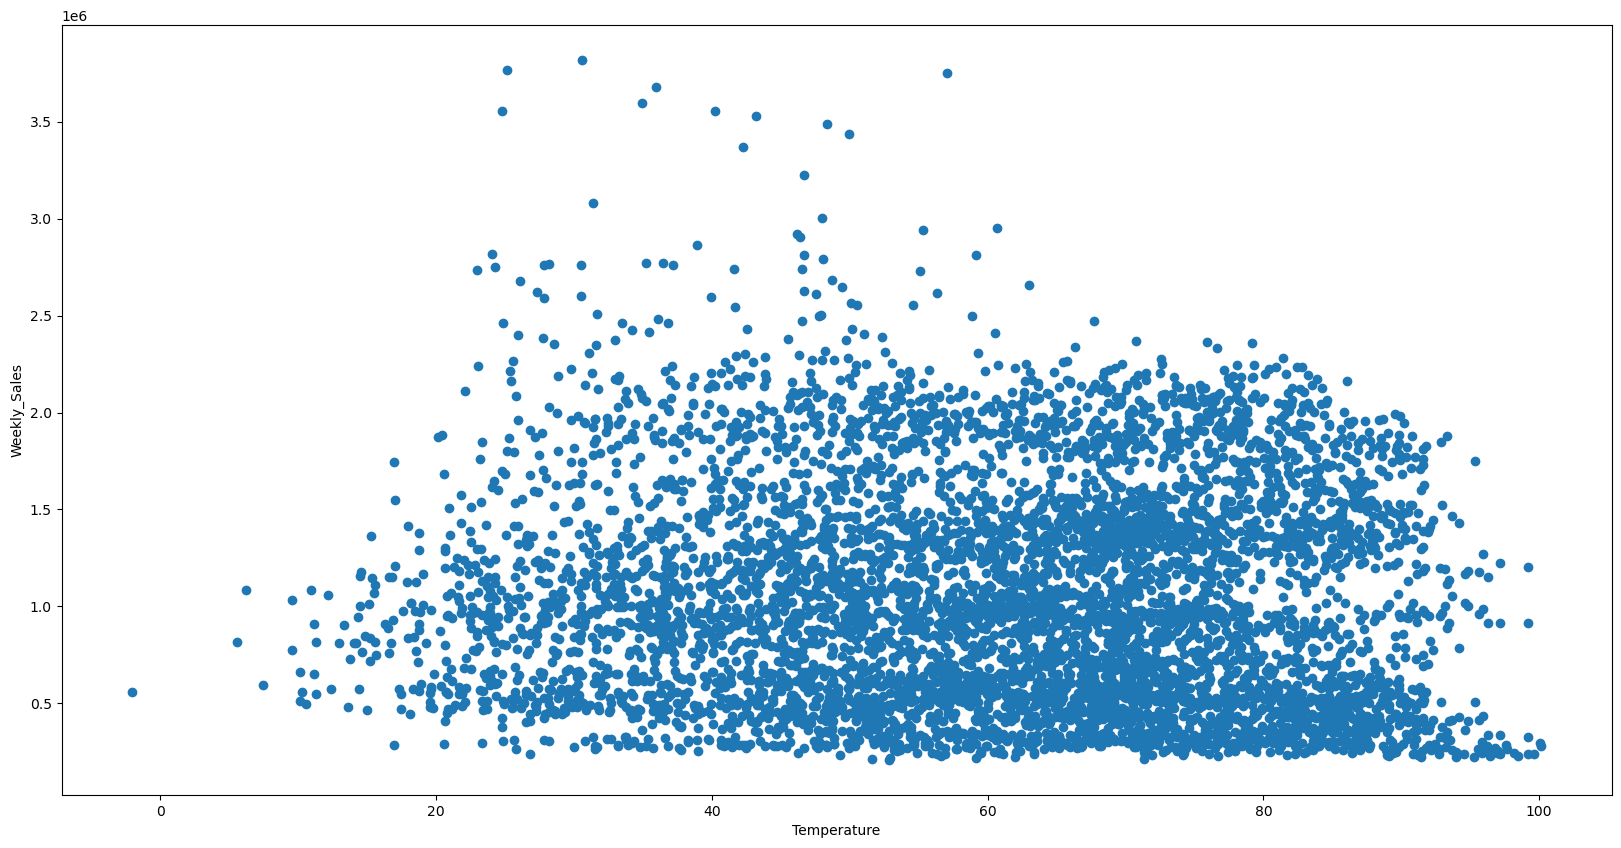

In [35]:
plt.scatter(data['Temperature'],data['Weekly_Sales'])
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")
plt.show()

# Calculate R**2 (R Square) Value

In [36]:
ss_t = 0  # total sum of square
ss_r = 0  # total sum of square of residuals
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r / ss_t)
print(r2)

0.004071717781965134


# Scikit-Learn

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
# Connot use Rank 1 matrix in scikit-learn
X = X.reshape((m,1))

# Creating model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X,Y)

# Y Prediction
Y_pred = reg.predict(X)

# Calculate R2 Score
r2_score = reg.score(X,Y)

In [39]:
print(r2_score)

0.004071717781963913
